# Student Performance Prediction
this notebook predicts the performance of a student based on dataset

# Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import validation_curve, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from statsmodels.regression.linear_model import OLS
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from scipy import stats
from sklearn.metrics import r2_score
from scipy.stats import jarque_bera, normaltest
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import itertools
import requests
import zipfile
import os
import io
import base64
from io import BytesIO
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
np.random.seed(42)

# Data Loading and Initial Exploration

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))
math_df = pd.read_csv(z.open('student-mat.csv'), sep=';')
port_df = pd.read_csv(z.open('student-por.csv'), sep=';')

math_df['subject'] = 'math'
port_df['subject'] = 'portuguese'
df = pd.concat([math_df, port_df], ignore_index=True)

print(f"Dataset shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Target variable (G3) statistics:")
print(df['G3'].describe())

Dataset shape: (1044, 34)
Missing values: 0
Target variable (G3) statistics:
count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: G3, dtype: float64


# Data Exploration

Data Types:
object    18
int64     16
Name: count, dtype: int64

Unique values in categorical columns:
school: 2 unique values
sex: 2 unique values
address: 2 unique values
famsize: 2 unique values
Pstatus: 2 unique values
Mjob: 5 unique values
Fjob: 5 unique values
reason: 4 unique values
guardian: 3 unique values
schoolsup: 2 unique values
famsup: 2 unique values
paid: 2 unique values
activities: 2 unique values
nursery: 2 unique values
higher: 2 unique values
internet: 2 unique values
romantic: 2 unique values
subject: 2 unique values


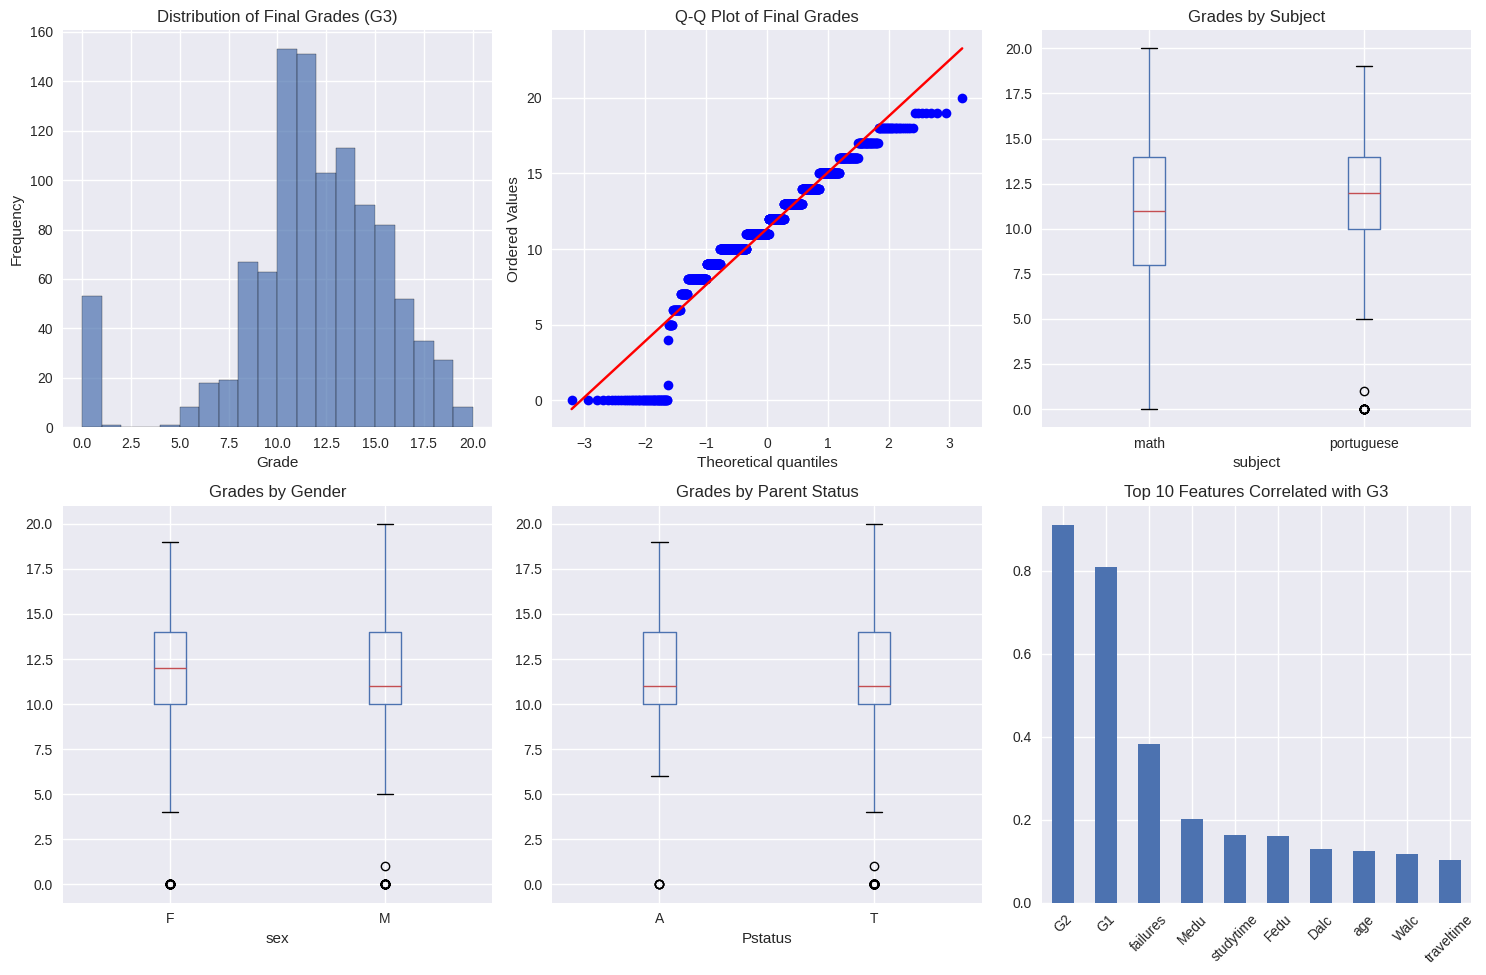

In [3]:
print("Data Types:")
print(df.dtypes.value_counts())
print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.hist(df['G3'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
stats.probplot(df['G3'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Final Grades')

plt.subplot(2, 3, 3)
df.boxplot(column='G3', by='subject', ax=plt.gca())
plt.title('Grades by Subject')
plt.suptitle('')

plt.subplot(2, 3, 4)
df.boxplot(column='G3', by='sex', ax=plt.gca())
plt.title('Grades by Gender')
plt.suptitle('')

plt.subplot(2, 3, 5)
df.boxplot(column='G3', by='Pstatus', ax=plt.gca())
plt.title('Grades by Parent Status')
plt.suptitle('')

plt.subplot(2, 3, 6)
numerical_df = df.select_dtypes(include=[np.number])
correlation_with_target = numerical_df.corr()['G3'].abs().sort_values(ascending=False)[1:11]
correlation_with_target.plot(kind='bar')
plt.title('Top 10 Features Correlated with G3')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()